In [ ]:
cimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

In [ ]:
from pathlib import Path
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ROOT = Path('/content/drive/MyDrive/IA-UT1')
except Exception:
    ROOT = Path.cwd() / 'IA-UT1'

DATA_DIR = ROOT / 'data'
RESULTS_DIR = ROOT / 'results'
for d in (DATA_DIR, RESULTS_DIR):
    d.mkdir(parents=True, exist_ok=True)
print('Outputs →', ROOT)

Outputs → /content/IA-UT1


In [ ]:
!pip -q install kaggle
from google.colab import files
files.upload()  # Subí tu archivo kaggle.json descargado
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic -p data
!unzip -o data/titanic.zip -d data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 116MB/s]
Archive:  data/titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
train.shape, train.columns


((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
train.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
train['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


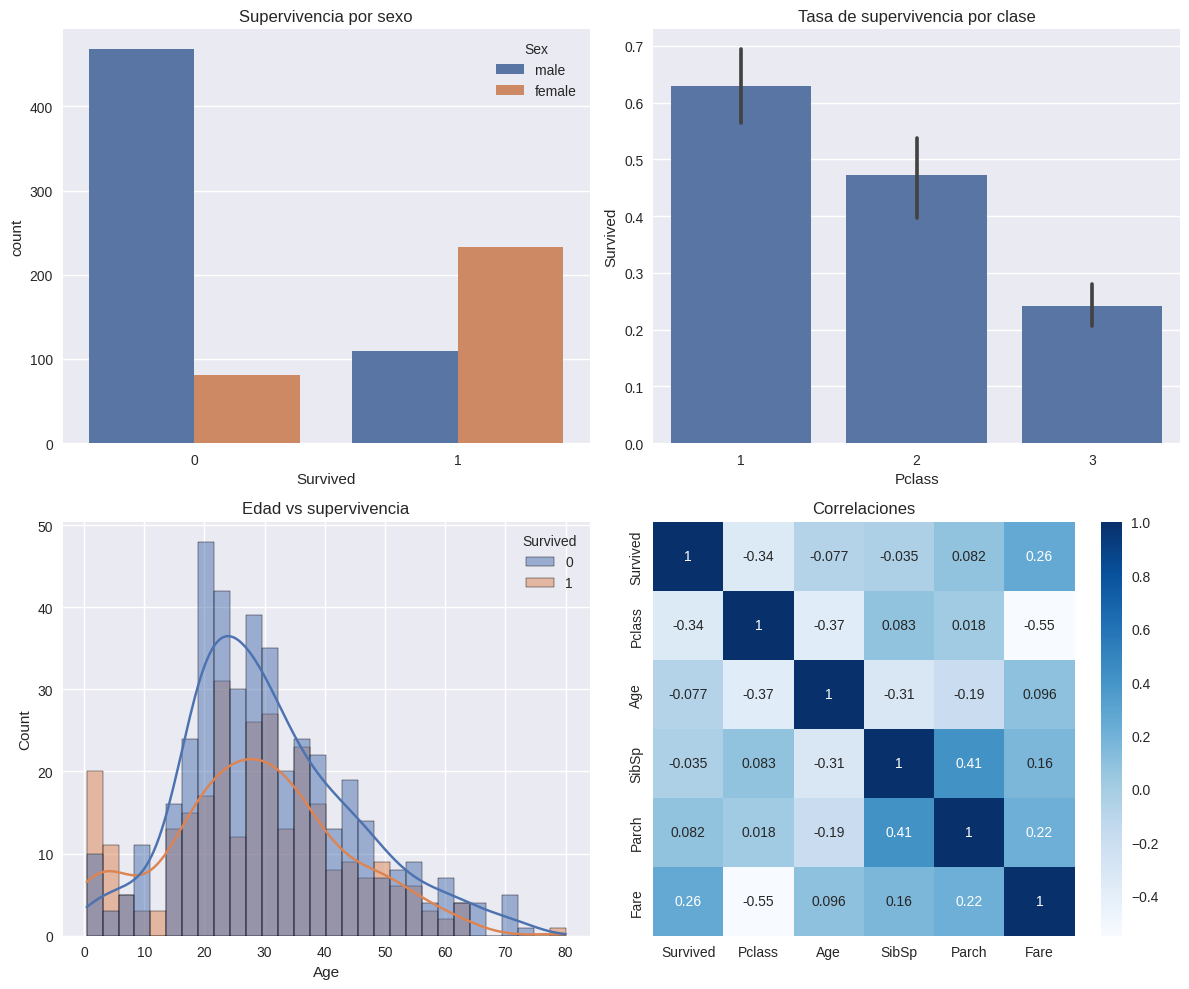

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Supervivencia global por sexo
sns.countplot(data=train, x='Survived', hue='Sex', ax=axes[0,0])
axes[0,0].set_title('Supervivencia por sexo')

# Tasa de supervivencia por clase
sns.barplot(data=train, x='Pclass', y='Survived', estimator=np.mean, ax=axes[0,1])
axes[0,1].set_title('Tasa de supervivencia por clase')

# Distribución de edad por supervivencia
sns.histplot(data=train, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1,0])
axes[1,0].set_title('Edad vs supervivencia')

# Correlaciones numéricas
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Correlaciones')

plt.tight_layout()
plt.show()

In [11]:
df = train.copy()

# 🚫 PASO 1: Manejar valores faltantes (imputación)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Valor más común
df['Fare'] = df['Fare'].fillna(df['Fare'].median())              # Mediana
df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'))

# 🆕 PASO 2: Crear nuevas features útiles
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(',\s*([^\.]+)\.')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# 🔄 PASO 3: Preparar datos para el modelo
features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize','IsAlone','Title','SibSp','Parch']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Survived']

X.shape, y.shape

((891, 14), (891,))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
baseline_pred = dummy.predict(X_test)

lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('Baseline acc:', accuracy_score(y_test, baseline_pred))
print('LogReg acc  :', accuracy_score(y_test, pred))

print('\nClassification report (LogReg):')
print(classification_report(y_test, pred))

print('\nConfusion matrix (LogReg):')
print(confusion_matrix(y_test, pred))

Baseline acc: 0.6145251396648045
LogReg acc  : 0.8156424581005587

Classification report (LogReg):
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion matrix (LogReg):
[[98 12]
 [21 48]]
